In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv('../data/yelp_academic_dataset_review_truncated.csv')

In [10]:
[col for col in df]

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'vader']

In [5]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,vader
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7038
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.9875
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,-0.1779
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,0.6576
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,0.9604


In [2]:
for idx, row in df.iterrows():
    df.loc[idx, 'vader'] = analyzer.polarity_scores(row['text'])['compound']

In [3]:
x = df['stars']
y = df['vader']
fit = np.polyfit(x, y, 1)
fit_fx = np.poly1d(fit)

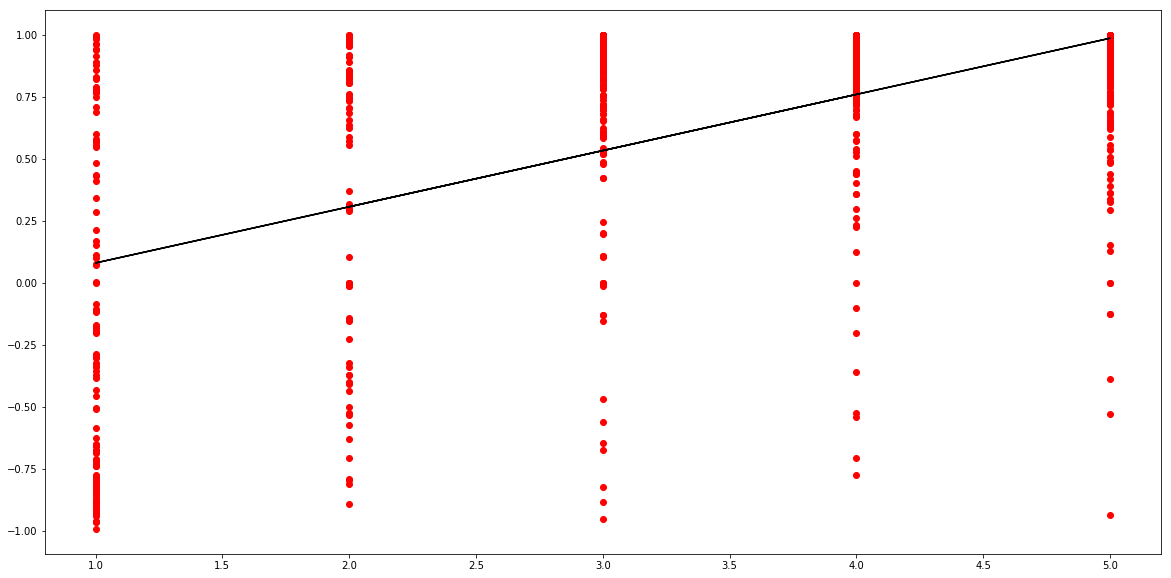

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'ro', x, fit_fx(x), 'k')